Yolonas complete code for detection on your Custom Data with brief explaination in google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


go the the directory in which your data is placed 
hirerachy
dataset
    train
    test 
    val

In [ ]:
import os
os.chdir("/content/drive/MyDrive/skin_data/bouy_project")

In [ ]:
!pip install -q supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
MODEL_ARCH = 'yolo_nas_l'

### if running first time uncomment this below cell and run the intall command

In [ ]:
!pip install super_gradients

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 50.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 120.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 109.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 11.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wh

In [ ]:
from super_gradients.training import models
model = models.get(MODEL_ARCH, pretrained_weights="coco").to(DEVICE)

[2023-09-23 19:54:39] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2023-09-23 19:54:39] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-09-23 19:54:45] INFO - utils.py - NumExpr defaulting to 2 threads.
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-09-23 19:54:50] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-09-23 19:54:50] WARNING - export.py - Failed to import pytorch_quantization
[2023-09-23 19:54:50] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-09-23 19:54:50] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2023-09-23 19:54:50] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2023-09-23 19:54:50] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2023-09-23 19:54:50] WARNING

In [ ]:
no_epoch=50

Setting the data path 


In [ ]:
dataset_params = {
    'data_dir': "/content/drive/MyDrive/skin_data/bouy_project", #mention the data directory here
    'train_images_dir':'train', #Inside the data directory you will have images of train add that folder name here
    'train_labels_dir':'train', #Inside the data directory you will have labels of train add that folder name here
    ## in the above case both images and labels are inside the same folder train in case if your data of images and labels are separate then add that folder
    'val_images_dir':'val',
    'val_labels_dir':'val',  
    # same process for testing and validation
    # 'test_images_dir':'test/images',
    # 'test_labels_dir':'test/labels',
    'classes': ['Green buoy', 'White buoy', 'White buoy'] #class names mentioned here 
}

In [ ]:
from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train, coco_detection_yolo_format_val)

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': 8,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': 8,
        'num_workers': 2
    }
)


[2023-09-23 19:55:05] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 136/136 [00:04<00:00, 28.35it/s] 
[2023-09-23 19:55:10] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations:  97%|█████████▋| 32/33 [00:51<00:01,  1.64s/it]

In [ ]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

In [ ]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
)

Indexing dataset annotations: 100%|██████████| 33/33 [00:52<00:00,  1.60s/it]
[2023-09-23 19:56:04] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-09-23 19:56:04] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [ ]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": no_epoch,
    # "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [ ]:
from super_gradients.training import Trainer
trainer = Trainer(experiment_name="Yolonas_exp", ckpt_root_dir="/content/drive/MyDrive/skin_data/bouy_project") #checkpoing location should be add here

In [ ]:
trainer.train(
    model=model,
    training_params=train_params,
    train_loader=train_data,
    valid_loader=val_data
)

The console stream is now moved to /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/console_Sep23_19_56_04.txt


[2023-09-23 19:56:04] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
[2023-09-23 19:56:08] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 136        (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_size)
    - Effective Batch size:         8          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         17         (len(train_loader))
    - Gradient updates per epoch:   17         (len(train_loader) / batch_accumulate)

[2023-09-23 19:56:08] INFO - sg_trainer.py - Started training for 50 epochs (0/49)

Validating: 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]
[2023-09-23 19:56:54] INFO - base_sg_logger.py - 

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 2.2677
│   ├── Ppyoloeloss/loss_iou = 0.3792
│   ├── Ppyoloeloss/loss_dfl = 1.0152
│   └── Ppyoloeloss/loss = 3.7234
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.8216
    ├── Ppyoloeloss/loss_iou = 0.2381
    ├── Ppyoloeloss/loss_dfl = 0.7171
    ├── Ppyoloeloss/loss = 3.7756
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.0001
    └── F1@0.50 = 0.0



Validating epoch 1: 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]
[2023-09-23 19:57:52] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 19:57:52] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.3103601932525635


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.4144
│   │   ├── Epoch N-1      = 2.2677 (↘ -0.8532)
│   │   └── Best until now = 2.2677 (↘ -0.8532)
│   ├── Ppyoloeloss/loss_iou = 0.2881
│   │   ├── Epoch N-1      = 0.3792 (↘ -0.0911)
│   │   └── Best until now = 0.3792 (↘ -0.0911)
│   ├── Ppyoloeloss/loss_dfl = 0.7198
│   │   ├── Epoch N-1      = 1.0152 (↘ -0.2954)
│   │   └── Best until now = 1.0152 (↘ -0.2954)
│   └── Ppyoloeloss/loss = 2.4946
│       ├── Epoch N-1      = 3.7234 (↘ -1.2287)
│       └── Best until now = 3.7234 (↘ -1.2287)
└── Validation
    ├── Ppyoloeloss/loss_cls = 3.5271
    │   ├── Epoch N-1      = 2.8216 (↗ 0.7054)
    │   └── Best until now = 2.8216 (↗ 0.7054)
    ├── Ppyoloeloss/loss_iou = 0.2253
    │   ├── Epoch N-1      = 0.2381 (↘ -0.0129)
    │   └── Best until now = 0.2381 (↘ -0.0129)
    ├── Ppyoloeloss/loss_dfl = 0.6585
    │   ├── Epoch N-1      = 0.7171 (↘ -0.0586)
    │   └── Best until now = 0.7171 (↘ -0.0586)
    ├── Ppyoloeloss/loss

Validating epoch 2: 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]
[2023-09-23 19:58:58] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 19:58:58] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.45325371623039246


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8988
│   │   ├── Epoch N-1      = 1.4144 (↘ -0.5156)
│   │   └── Best until now = 1.4144 (↘ -0.5156)
│   ├── Ppyoloeloss/loss_iou = 0.2708
│   │   ├── Epoch N-1      = 0.2881 (↘ -0.0173)
│   │   └── Best until now = 0.2881 (↘ -0.0173)
│   ├── Ppyoloeloss/loss_dfl = 0.7148
│   │   ├── Epoch N-1      = 0.7198 (↘ -0.005)
│   │   └── Best until now = 0.7198 (↘ -0.005)
│   └── Ppyoloeloss/loss = 1.9332
│       ├── Epoch N-1      = 2.4946 (↘ -0.5614)
│       └── Best until now = 2.4946 (↘ -0.5614)
└── Validation
    ├── Ppyoloeloss/loss_cls = 3.1163
    │   ├── Epoch N-1      = 3.5271 (↘ -0.4107)
    │   └── Best until now = 2.8216 (↗ 0.2947)
    ├── Ppyoloeloss/loss_iou = 0.219
    │   ├── Epoch N-1      = 0.2253 (↘ -0.0062)
    │   └── Best until now = 0.2253 (↘ -0.0062)
    ├── Ppyoloeloss/loss_dfl = 0.6633
    │   ├── Epoch N-1      = 0.6585 (↗ 0.0048)
    │   └── Best until now = 0.6585 (↗ 0.0048)
    ├── Ppyoloeloss/loss = 3

Validating epoch 3: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]
[2023-09-23 19:59:52] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 19:59:52] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5070132613182068


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8388
│   │   ├── Epoch N-1      = 0.8988 (↘ -0.06)
│   │   └── Best until now = 0.8988 (↘ -0.06)
│   ├── Ppyoloeloss/loss_iou = 0.275
│   │   ├── Epoch N-1      = 0.2708 (↗ 0.0041)
│   │   └── Best until now = 0.2708 (↗ 0.0041)
│   ├── Ppyoloeloss/loss_dfl = 0.7194
│   │   ├── Epoch N-1      = 0.7148 (↗ 0.0045)
│   │   └── Best until now = 0.7148 (↗ 0.0045)
│   └── Ppyoloeloss/loss = 1.8859
│       ├── Epoch N-1      = 1.9332 (↘ -0.0474)
│       └── Best until now = 1.9332 (↘ -0.0474)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.92
    │   ├── Epoch N-1      = 3.1163 (↘ -2.1964)
    │   └── Best until now = 2.8216 (↘ -1.9017)
    ├── Ppyoloeloss/loss_iou = 0.2104
    │   ├── Epoch N-1      = 0.219  (↘ -0.0087)
    │   └── Best until now = 0.219  (↘ -0.0087)
    ├── Ppyoloeloss/loss_dfl = 0.6316
    │   ├── Epoch N-1      = 0.6633 (↘ -0.0317)
    │   └── Best until now = 0.6585 (↘ -0.0269)
    ├── Ppyoloeloss/loss = 1.7617

Validating epoch 4: 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.822
│   │   ├── Epoch N-1      = 0.8388 (↘ -0.0168)
│   │   └── Best until now = 0.8388 (↘ -0.0168)
│   ├── Ppyoloeloss/loss_iou = 0.2717
│   │   ├── Epoch N-1      = 0.275  (↘ -0.0032)
│   │   └── Best until now = 0.2708 (↗ 0.0009)
│   ├── Ppyoloeloss/loss_dfl = 0.7133
│   │   ├── Epoch N-1      = 0.7194 (↘ -0.006)
│   │   └── Best until now = 0.7148 (↘ -0.0015)
│   └── Ppyoloeloss/loss = 1.858
│       ├── Epoch N-1      = 1.8859 (↘ -0.0279)
│       └── Best until now = 1.8859 (↘ -0.0279)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8374
    │   ├── Epoch N-1      = 0.92   (↘ -0.0826)
    │   └── Best until now = 0.92   (↘ -0.0826)
    ├── Ppyoloeloss/loss_iou = 0.2247
    │   ├── Epoch N-1      = 0.2104 (↗ 0.0143)
    │   └── Best until now = 0.2104 (↗ 0.0143)
    ├── Ppyoloeloss/loss_dfl = 0.6444
    │   ├── Epoch N-1      = 0.6316 (↗ 0.0129)
    │   └── Best until now = 0.6316 (↗ 0.0129)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 5: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]
[2023-09-23 20:02:06] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 20:02:06] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5676702857017517


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7987
│   │   ├── Epoch N-1      = 0.822  (↘ -0.0233)
│   │   └── Best until now = 0.822  (↘ -0.0233)
│   ├── Ppyoloeloss/loss_iou = 0.2729
│   │   ├── Epoch N-1      = 0.2717 (↗ 0.0011)
│   │   └── Best until now = 0.2708 (↗ 0.002)
│   ├── Ppyoloeloss/loss_dfl = 0.7057
│   │   ├── Epoch N-1      = 0.7133 (↘ -0.0077)
│   │   └── Best until now = 0.7133 (↘ -0.0077)
│   └── Ppyoloeloss/loss = 1.8337
│       ├── Epoch N-1      = 1.858  (↘ -0.0243)
│       └── Best until now = 1.858  (↘ -0.0243)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7512
    │   ├── Epoch N-1      = 0.8374 (↘ -0.0862)
    │   └── Best until now = 0.8374 (↘ -0.0862)
    ├── Ppyoloeloss/loss_iou = 0.2222
    │   ├── Epoch N-1      = 0.2247 (↘ -0.0025)
    │   └── Best until now = 0.2104 (↗ 0.0118)
    ├── Ppyoloeloss/loss_dfl = 0.6378
    │   ├── Epoch N-1      = 0.6444 (↘ -0.0066)
    │   └── Best until now = 0.6316 (↗ 0.0063)
    ├── Ppyoloeloss/loss = 

Validating epoch 6: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
[2023-09-23 20:03:22] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 20:03:22] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5875707864761353


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7781
│   │   ├── Epoch N-1      = 0.7987 (↘ -0.0206)
│   │   └── Best until now = 0.7987 (↘ -0.0206)
│   ├── Ppyoloeloss/loss_iou = 0.2649
│   │   ├── Epoch N-1      = 0.2729 (↘ -0.008)
│   │   └── Best until now = 0.2708 (↘ -0.006)
│   ├── Ppyoloeloss/loss_dfl = 0.7125
│   │   ├── Epoch N-1      = 0.7057 (↗ 0.0068)
│   │   └── Best until now = 0.7057 (↗ 0.0068)
│   └── Ppyoloeloss/loss = 1.7964
│       ├── Epoch N-1      = 1.8337 (↘ -0.0372)
│       └── Best until now = 1.8337 (↘ -0.0372)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7164
    │   ├── Epoch N-1      = 0.7512 (↘ -0.0347)
    │   └── Best until now = 0.7512 (↘ -0.0347)
    ├── Ppyoloeloss/loss_iou = 0.2196
    │   ├── Epoch N-1      = 0.2222 (↘ -0.0026)
    │   └── Best until now = 0.2104 (↗ 0.0092)
    ├── Ppyoloeloss/loss_dfl = 0.6325
    │   ├── Epoch N-1      = 0.6378 (↘ -0.0054)
    │   └── Best until now = 0.6316 (↗ 0.0009)
    ├── Ppyoloeloss/loss = 1

Validating epoch 7: 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7786
│   │   ├── Epoch N-1      = 0.7781 (↗ 0.0005)
│   │   └── Best until now = 0.7781 (↗ 0.0005)
│   ├── Ppyoloeloss/loss_iou = 0.258
│   │   ├── Epoch N-1      = 0.2649 (↘ -0.0069)
│   │   └── Best until now = 0.2649 (↘ -0.0069)
│   ├── Ppyoloeloss/loss_dfl = 0.6822
│   │   ├── Epoch N-1      = 0.7125 (↘ -0.0303)
│   │   └── Best until now = 0.7057 (↘ -0.0235)
│   └── Ppyoloeloss/loss = 1.7646
│       ├── Epoch N-1      = 1.7964 (↘ -0.0318)
│       └── Best until now = 1.7964 (↘ -0.0318)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7301
    │   ├── Epoch N-1      = 0.7164 (↗ 0.0137)
    │   └── Best until now = 0.7164 (↗ 0.0137)
    ├── Ppyoloeloss/loss_iou = 0.2149
    │   ├── Epoch N-1      = 0.2196 (↘ -0.0047)
    │   └── Best until now = 0.2104 (↗ 0.0045)
    ├── Ppyoloeloss/loss_dfl = 0.6171
    │   ├── Epoch N-1      = 0.6325 (↘ -0.0154)
    │   └── Best until now = 0.6316 (↘ -0.0145)
    ├── Ppyoloeloss/loss = 1

Validating epoch 8: 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]
[2023-09-23 20:05:51] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 20:05:51] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5971084237098694


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.755
│   │   ├── Epoch N-1      = 0.7786 (↘ -0.0236)
│   │   └── Best until now = 0.7781 (↘ -0.0231)
│   ├── Ppyoloeloss/loss_iou = 0.258
│   │   ├── Epoch N-1      = 0.258  (↗ 1e-04)
│   │   └── Best until now = 0.258  (↗ 1e-04)
│   ├── Ppyoloeloss/loss_dfl = 0.6972
│   │   ├── Epoch N-1      = 0.6822 (↗ 0.015)
│   │   └── Best until now = 0.6822 (↗ 0.015)
│   └── Ppyoloeloss/loss = 1.7486
│       ├── Epoch N-1      = 1.7646 (↘ -0.016)
│       └── Best until now = 1.7646 (↘ -0.016)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7228
    │   ├── Epoch N-1      = 0.7301 (↘ -0.0073)
    │   └── Best until now = 0.7164 (↗ 0.0063)
    ├── Ppyoloeloss/loss_iou = 0.2226
    │   ├── Epoch N-1      = 0.2149 (↗ 0.0077)
    │   └── Best until now = 0.2104 (↗ 0.0122)
    ├── Ppyoloeloss/loss_dfl = 0.6295
    │   ├── Epoch N-1      = 0.6171 (↗ 0.0124)
    │   └── Best until now = 0.6171 (↗ 0.0124)
    ├── Ppyoloeloss/loss = 1.594
    │ 

Validating epoch 9: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7538
│   │   ├── Epoch N-1      = 0.755  (↘ -0.0012)
│   │   └── Best until now = 0.755  (↘ -0.0012)
│   ├── Ppyoloeloss/loss_iou = 0.2587
│   │   ├── Epoch N-1      = 0.258  (↗ 0.0006)
│   │   └── Best until now = 0.258  (↗ 0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.6961
│   │   ├── Epoch N-1      = 0.6972 (↘ -0.0011)
│   │   └── Best until now = 0.6822 (↗ 0.0139)
│   └── Ppyoloeloss/loss = 1.7485
│       ├── Epoch N-1      = 1.7486 (↘ -1e-04)
│       └── Best until now = 1.7486 (↘ -1e-04)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7107
    │   ├── Epoch N-1      = 0.7228 (↘ -0.0121)
    │   └── Best until now = 0.7164 (↘ -0.0057)
    ├── Ppyoloeloss/loss_iou = 0.2169
    │   ├── Epoch N-1      = 0.2226 (↘ -0.0057)
    │   └── Best until now = 0.2104 (↗ 0.0065)
    ├── Ppyoloeloss/loss_dfl = 0.6186
    │   ├── Epoch N-1      = 0.6295 (↘ -0.0109)
    │   └── Best until now = 0.6171 (↗ 0.0015)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 10: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7507
│   │   ├── Epoch N-1      = 0.7538 (↘ -0.0032)
│   │   └── Best until now = 0.7538 (↘ -0.0032)
│   ├── Ppyoloeloss/loss_iou = 0.2521
│   │   ├── Epoch N-1      = 0.2587 (↘ -0.0066)
│   │   └── Best until now = 0.258  (↘ -0.0059)
│   ├── Ppyoloeloss/loss_dfl = 0.6686
│   │   ├── Epoch N-1      = 0.6961 (↘ -0.0275)
│   │   └── Best until now = 0.6822 (↘ -0.0137)
│   └── Ppyoloeloss/loss = 1.7151
│       ├── Epoch N-1      = 1.7485 (↘ -0.0334)
│       └── Best until now = 1.7485 (↘ -0.0334)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7076
    │   ├── Epoch N-1      = 0.7107 (↘ -0.0031)
    │   └── Best until now = 0.7107 (↘ -0.0031)
    ├── Ppyoloeloss/loss_iou = 0.2077
    │   ├── Epoch N-1      = 0.2169 (↘ -0.0092)
    │   └── Best until now = 0.2104 (↘ -0.0027)
    ├── Ppyoloeloss/loss_dfl = 0.6166
    │   ├── Epoch N-1      = 0.6186 (↘ -0.002)
    │   └── Best until now = 0.6171 (↘ -0.0005)
    ├── Ppyoloeloss/lo

Validating epoch 11: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]
[2023-09-23 20:10:07] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 20:10:07] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6104552149772644


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7602
│   │   ├── Epoch N-1      = 0.7507 (↗ 0.0096)
│   │   └── Best until now = 0.7507 (↗ 0.0096)
│   ├── Ppyoloeloss/loss_iou = 0.2455
│   │   ├── Epoch N-1      = 0.2521 (↘ -0.0066)
│   │   └── Best until now = 0.2521 (↘ -0.0066)
│   ├── Ppyoloeloss/loss_dfl = 0.668
│   │   ├── Epoch N-1      = 0.6686 (↘ -0.0006)
│   │   └── Best until now = 0.6686 (↘ -0.0006)
│   └── Ppyoloeloss/loss = 1.708
│       ├── Epoch N-1      = 1.7151 (↘ -0.0071)
│       └── Best until now = 1.7151 (↘ -0.0071)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7355
    │   ├── Epoch N-1      = 0.7076 (↗ 0.0279)
    │   └── Best until now = 0.7076 (↗ 0.0279)
    ├── Ppyoloeloss/loss_iou = 0.207
    │   ├── Epoch N-1      = 0.2077 (↘ -0.0007)
    │   └── Best until now = 0.2077 (↘ -0.0007)
    ├── Ppyoloeloss/loss_dfl = 0.6221
    │   ├── Epoch N-1      = 0.6166 (↗ 0.0055)
    │   └── Best until now = 0.6166 (↗ 0.0055)
    ├── Ppyoloeloss/loss = 1.5

Validating epoch 12: 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]
[2023-09-23 20:12:02] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 20:12:02] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6276273131370544


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7375
│   │   ├── Epoch N-1      = 0.7602 (↘ -0.0228)
│   │   └── Best until now = 0.7507 (↘ -0.0132)
│   ├── Ppyoloeloss/loss_iou = 0.2466
│   │   ├── Epoch N-1      = 0.2455 (↗ 0.001)
│   │   └── Best until now = 0.2455 (↗ 0.001)
│   ├── Ppyoloeloss/loss_dfl = 0.6678
│   │   ├── Epoch N-1      = 0.668  (↘ -0.0002)
│   │   └── Best until now = 0.668  (↘ -0.0002)
│   └── Ppyoloeloss/loss = 1.6878
│       ├── Epoch N-1      = 1.708  (↘ -0.0203)
│       └── Best until now = 1.708  (↘ -0.0203)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7161
    │   ├── Epoch N-1      = 0.7355 (↘ -0.0194)
    │   └── Best until now = 0.7076 (↗ 0.0085)
    ├── Ppyoloeloss/loss_iou = 0.2157
    │   ├── Epoch N-1      = 0.207  (↗ 0.0087)
    │   └── Best until now = 0.207  (↗ 0.0087)
    ├── Ppyoloeloss/loss_dfl = 0.6301
    │   ├── Epoch N-1      = 0.6221 (↗ 0.0079)
    │   └── Best until now = 0.6166 (↗ 0.0135)
    ├── Ppyoloeloss/loss = 1.5

Validating epoch 13: 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7332
│   │   ├── Epoch N-1      = 0.7375 (↘ -0.0043)
│   │   └── Best until now = 0.7375 (↘ -0.0043)
│   ├── Ppyoloeloss/loss_iou = 0.2434
│   │   ├── Epoch N-1      = 0.2466 (↘ -0.0031)
│   │   └── Best until now = 0.2455 (↘ -0.0021)
│   ├── Ppyoloeloss/loss_dfl = 0.6695
│   │   ├── Epoch N-1      = 0.6678 (↗ 0.0017)
│   │   └── Best until now = 0.6678 (↗ 0.0017)
│   └── Ppyoloeloss/loss = 1.6765
│       ├── Epoch N-1      = 1.6878 (↘ -0.0113)
│       └── Best until now = 1.6878 (↘ -0.0113)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6894
    │   ├── Epoch N-1      = 0.7161 (↘ -0.0267)
    │   └── Best until now = 0.7076 (↘ -0.0181)
    ├── Ppyoloeloss/loss_iou = 0.2094
    │   ├── Epoch N-1      = 0.2157 (↘ -0.0063)
    │   └── Best until now = 0.207  (↗ 0.0024)
    ├── Ppyoloeloss/loss_dfl = 0.6261
    │   ├── Epoch N-1      = 0.6301 (↘ -0.004)
    │   └── Best until now = 0.6166 (↗ 0.0095)
    ├── Ppyoloeloss/loss =

Validating epoch 14: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7389
│   │   ├── Epoch N-1      = 0.7332 (↗ 0.0057)
│   │   └── Best until now = 0.7332 (↗ 0.0057)
│   ├── Ppyoloeloss/loss_iou = 0.2432
│   │   ├── Epoch N-1      = 0.2434 (↘ -0.0002)
│   │   └── Best until now = 0.2434 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.6652
│   │   ├── Epoch N-1      = 0.6695 (↘ -0.0042)
│   │   └── Best until now = 0.6678 (↘ -0.0025)
│   └── Ppyoloeloss/loss = 1.6796
│       ├── Epoch N-1      = 1.6765 (↗ 0.0031)
│       └── Best until now = 1.6765 (↗ 0.0031)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6856
    │   ├── Epoch N-1      = 0.6894 (↘ -0.0039)
    │   └── Best until now = 0.6894 (↘ -0.0039)
    ├── Ppyoloeloss/loss_iou = 0.2059
    │   ├── Epoch N-1      = 0.2094 (↘ -0.0035)
    │   └── Best until now = 0.207  (↘ -0.0011)
    ├── Ppyoloeloss/loss_dfl = 0.6187
    │   ├── Epoch N-1      = 0.6261 (↘ -0.0073)
    │   └── Best until now = 0.6166 (↗ 0.0021)
    ├── Ppyoloeloss/loss =

Validating epoch 15: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7451
│   │   ├── Epoch N-1      = 0.7389 (↗ 0.0062)
│   │   └── Best until now = 0.7332 (↗ 0.0119)
│   ├── Ppyoloeloss/loss_iou = 0.2498
│   │   ├── Epoch N-1      = 0.2432 (↗ 0.0066)
│   │   └── Best until now = 0.2432 (↗ 0.0066)
│   ├── Ppyoloeloss/loss_dfl = 0.6908
│   │   ├── Epoch N-1      = 0.6652 (↗ 0.0256)
│   │   └── Best until now = 0.6652 (↗ 0.0256)
│   └── Ppyoloeloss/loss = 1.715
│       ├── Epoch N-1      = 1.6796 (↗ 0.0354)
│       └── Best until now = 1.6765 (↗ 0.0385)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6827
    │   ├── Epoch N-1      = 0.6856 (↘ -0.0029)
    │   └── Best until now = 0.6856 (↘ -0.0029)
    ├── Ppyoloeloss/loss_iou = 0.1996
    │   ├── Epoch N-1      = 0.2059 (↘ -0.0063)
    │   └── Best until now = 0.2059 (↘ -0.0063)
    ├── Ppyoloeloss/loss_dfl = 0.6138
    │   ├── Epoch N-1      = 0.6187 (↘ -0.005)
    │   └── Best until now = 0.6166 (↘ -0.0028)
    ├── Ppyoloeloss/loss = 1.48

Validating epoch 16: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
[2023-09-23 20:21:50] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 20:21:50] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6347828507423401


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7547
│   │   ├── Epoch N-1      = 0.7451 (↗ 0.0096)
│   │   └── Best until now = 0.7332 (↗ 0.0215)
│   ├── Ppyoloeloss/loss_iou = 0.2478
│   │   ├── Epoch N-1      = 0.2498 (↘ -0.002)
│   │   └── Best until now = 0.2432 (↗ 0.0046)
│   ├── Ppyoloeloss/loss_dfl = 0.6664
│   │   ├── Epoch N-1      = 0.6908 (↘ -0.0244)
│   │   └── Best until now = 0.6652 (↗ 0.0012)
│   └── Ppyoloeloss/loss = 1.7075
│       ├── Epoch N-1      = 1.715  (↘ -0.0076)
│       └── Best until now = 1.6765 (↗ 0.031)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6909
    │   ├── Epoch N-1      = 0.6827 (↗ 0.0082)
    │   └── Best until now = 0.6827 (↗ 0.0082)
    ├── Ppyoloeloss/loss_iou = 0.2027
    │   ├── Epoch N-1      = 0.1996 (↗ 0.0031)
    │   └── Best until now = 0.1996 (↗ 0.0031)
    ├── Ppyoloeloss/loss_dfl = 0.6151
    │   ├── Epoch N-1      = 0.6138 (↗ 0.0013)
    │   └── Best until now = 0.6138 (↗ 0.0013)
    ├── Ppyoloeloss/loss = 1.5051


Validating epoch 17: 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7565
│   │   ├── Epoch N-1      = 0.7547 (↗ 0.0018)
│   │   └── Best until now = 0.7332 (↗ 0.0233)
│   ├── Ppyoloeloss/loss_iou = 0.2477
│   │   ├── Epoch N-1      = 0.2478 (↘ -1e-04)
│   │   └── Best until now = 0.2432 (↗ 0.0045)
│   ├── Ppyoloeloss/loss_dfl = 0.6809
│   │   ├── Epoch N-1      = 0.6664 (↗ 0.0144)
│   │   └── Best until now = 0.6652 (↗ 0.0156)
│   └── Ppyoloeloss/loss = 1.7162
│       ├── Epoch N-1      = 1.7075 (↗ 0.0088)
│       └── Best until now = 1.6765 (↗ 0.0397)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6809
    │   ├── Epoch N-1      = 0.6909 (↘ -0.01)
    │   └── Best until now = 0.6827 (↘ -0.0017)
    ├── Ppyoloeloss/loss_iou = 0.2002
    │   ├── Epoch N-1      = 0.2027 (↘ -0.0024)
    │   └── Best until now = 0.1996 (↗ 0.0007)
    ├── Ppyoloeloss/loss_dfl = 0.6198
    │   ├── Epoch N-1      = 0.6151 (↗ 0.0048)
    │   └── Best until now = 0.6138 (↗ 0.0061)
    ├── Ppyoloeloss/loss = 1.4915


Validating epoch 18: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
[2023-09-23 20:26:01] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 20:26:01] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6365030407905579


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7454
│   │   ├── Epoch N-1      = 0.7565 (↘ -0.0111)
│   │   └── Best until now = 0.7332 (↗ 0.0122)
│   ├── Ppyoloeloss/loss_iou = 0.2423
│   │   ├── Epoch N-1      = 0.2477 (↘ -0.0054)
│   │   └── Best until now = 0.2432 (↘ -0.0009)
│   ├── Ppyoloeloss/loss_dfl = 0.6765
│   │   ├── Epoch N-1      = 0.6809 (↘ -0.0044)
│   │   └── Best until now = 0.6652 (↗ 0.0112)
│   └── Ppyoloeloss/loss = 1.6895
│       ├── Epoch N-1      = 1.7162 (↘ -0.0268)
│       └── Best until now = 1.6765 (↗ 0.013)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6789
    │   ├── Epoch N-1      = 0.6809 (↘ -0.0021)
    │   └── Best until now = 0.6809 (↘ -0.0021)
    ├── Ppyoloeloss/loss_iou = 0.2062
    │   ├── Epoch N-1      = 0.2002 (↗ 0.0059)
    │   └── Best until now = 0.1996 (↗ 0.0066)
    ├── Ppyoloeloss/loss_dfl = 0.6176
    │   ├── Epoch N-1      = 0.6198 (↘ -0.0023)
    │   └── Best until now = 0.6138 (↗ 0.0038)
    ├── Ppyoloeloss/loss = 1

Validating epoch 19: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7329
│   │   ├── Epoch N-1      = 0.7454 (↘ -0.0125)
│   │   └── Best until now = 0.7332 (↘ -0.0003)
│   ├── Ppyoloeloss/loss_iou = 0.2446
│   │   ├── Epoch N-1      = 0.2423 (↗ 0.0023)
│   │   └── Best until now = 0.2423 (↗ 0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.6763
│   │   ├── Epoch N-1      = 0.6765 (↘ -1e-04)
│   │   └── Best until now = 0.6652 (↗ 0.0111)
│   └── Ppyoloeloss/loss = 1.6826
│       ├── Epoch N-1      = 1.6895 (↘ -0.0068)
│       └── Best until now = 1.6765 (↗ 0.0061)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6865
    │   ├── Epoch N-1      = 0.6789 (↗ 0.0076)
    │   └── Best until now = 0.6789 (↗ 0.0076)
    ├── Ppyoloeloss/loss_iou = 0.2078
    │   ├── Epoch N-1      = 0.2062 (↗ 0.0016)
    │   └── Best until now = 0.1996 (↗ 0.0082)
    ├── Ppyoloeloss/loss_dfl = 0.6193
    │   ├── Epoch N-1      = 0.6176 (↗ 0.0017)
    │   └── Best until now = 0.6138 (↗ 0.0055)
    ├── Ppyoloeloss/loss = 1.515

Validating epoch 20: 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


SUMMARY OF EPOCH 20
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7131
│   │   ├── Epoch N-1      = 0.7329 (↘ -0.0198)
│   │   └── Best until now = 0.7329 (↘ -0.0198)
│   ├── Ppyoloeloss/loss_iou = 0.2418
│   │   ├── Epoch N-1      = 0.2446 (↘ -0.0029)
│   │   └── Best until now = 0.2423 (↘ -0.0006)
│   ├── Ppyoloeloss/loss_dfl = 0.676
│   │   ├── Epoch N-1      = 0.6763 (↘ -0.0003)
│   │   └── Best until now = 0.6652 (↗ 0.0108)
│   └── Ppyoloeloss/loss = 1.6555
│       ├── Epoch N-1      = 1.6826 (↘ -0.0271)
│       └── Best until now = 1.6765 (↘ -0.021)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6779
    │   ├── Epoch N-1      = 0.6865 (↘ -0.0086)
    │   └── Best until now = 0.6789 (↘ -0.001)
    ├── Ppyoloeloss/loss_iou = 0.1988
    │   ├── Epoch N-1      = 0.2078 (↘ -0.009)
    │   └── Best until now = 0.1996 (↘ -0.0008)
    ├── Ppyoloeloss/loss_dfl = 0.6063
    │   ├── Epoch N-1      = 0.6193 (↘ -0.013)
    │   └── Best until now = 0.6138 (↘ -0.0074)
    ├── Ppyoloeloss/loss = 

Validating epoch 21: 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


SUMMARY OF EPOCH 21
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7097
│   │   ├── Epoch N-1      = 0.7131 (↘ -0.0034)
│   │   └── Best until now = 0.7131 (↘ -0.0034)
│   ├── Ppyoloeloss/loss_iou = 0.2368
│   │   ├── Epoch N-1      = 0.2418 (↘ -0.005)
│   │   └── Best until now = 0.2418 (↘ -0.005)
│   ├── Ppyoloeloss/loss_dfl = 0.6588
│   │   ├── Epoch N-1      = 0.676  (↘ -0.0173)
│   │   └── Best until now = 0.6652 (↘ -0.0065)
│   └── Ppyoloeloss/loss = 1.631
│       ├── Epoch N-1      = 1.6555 (↘ -0.0245)
│       └── Best until now = 1.6555 (↘ -0.0245)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6814
    │   ├── Epoch N-1      = 0.6779 (↗ 0.0035)
    │   └── Best until now = 0.6779 (↗ 0.0035)
    ├── Ppyoloeloss/loss_iou = 0.2047
    │   ├── Epoch N-1      = 0.1988 (↗ 0.0059)
    │   └── Best until now = 0.1988 (↗ 0.0059)
    ├── Ppyoloeloss/loss_dfl = 0.6106
    │   ├── Epoch N-1      = 0.6063 (↗ 0.0042)
    │   └── Best until now = 0.6063 (↗ 0.0042)
    ├── Ppyoloeloss/loss = 1.4

Validating epoch 22: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


SUMMARY OF EPOCH 22
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7209
│   │   ├── Epoch N-1      = 0.7097 (↗ 0.0112)
│   │   └── Best until now = 0.7097 (↗ 0.0112)
│   ├── Ppyoloeloss/loss_iou = 0.2448
│   │   ├── Epoch N-1      = 0.2368 (↗ 0.0081)
│   │   └── Best until now = 0.2368 (↗ 0.0081)
│   ├── Ppyoloeloss/loss_dfl = 0.6455
│   │   ├── Epoch N-1      = 0.6588 (↘ -0.0133)
│   │   └── Best until now = 0.6588 (↘ -0.0133)
│   └── Ppyoloeloss/loss = 1.6557
│       ├── Epoch N-1      = 1.631  (↗ 0.0247)
│       └── Best until now = 1.631  (↗ 0.0247)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6851
    │   ├── Epoch N-1      = 0.6814 (↗ 0.0037)
    │   └── Best until now = 0.6779 (↗ 0.0071)
    ├── Ppyoloeloss/loss_iou = 0.2007
    │   ├── Epoch N-1      = 0.2047 (↘ -0.004)
    │   └── Best until now = 0.1988 (↗ 0.0019)
    ├── Ppyoloeloss/loss_dfl = 0.6096
    │   ├── Epoch N-1      = 0.6106 (↘ -0.001)
    │   └── Best until now = 0.6063 (↗ 0.0032)
    ├── Ppyoloeloss/loss = 1.4916

Validating epoch 23: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


SUMMARY OF EPOCH 23
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7104
│   │   ├── Epoch N-1      = 0.7209 (↘ -0.0105)
│   │   └── Best until now = 0.7097 (↗ 0.0007)
│   ├── Ppyoloeloss/loss_iou = 0.2422
│   │   ├── Epoch N-1      = 0.2448 (↘ -0.0026)
│   │   └── Best until now = 0.2368 (↗ 0.0054)
│   ├── Ppyoloeloss/loss_dfl = 0.6697
│   │   ├── Epoch N-1      = 0.6455 (↗ 0.0242)
│   │   └── Best until now = 0.6455 (↗ 0.0242)
│   └── Ppyoloeloss/loss = 1.6507
│       ├── Epoch N-1      = 1.6557 (↘ -0.005)
│       └── Best until now = 1.631  (↗ 0.0197)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6891
    │   ├── Epoch N-1      = 0.6851 (↗ 0.004)
    │   └── Best until now = 0.6779 (↗ 0.0112)
    ├── Ppyoloeloss/loss_iou = 0.2029
    │   ├── Epoch N-1      = 0.2007 (↗ 0.0022)
    │   └── Best until now = 0.1988 (↗ 0.0041)
    ├── Ppyoloeloss/loss_dfl = 0.6109
    │   ├── Epoch N-1      = 0.6096 (↗ 0.0013)
    │   └── Best until now = 0.6063 (↗ 0.0046)
    ├── Ppyoloeloss/loss = 1.5019


Validating epoch 24: 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


SUMMARY OF EPOCH 24
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7091
│   │   ├── Epoch N-1      = 0.7104 (↘ -0.0013)
│   │   └── Best until now = 0.7097 (↘ -0.0006)
│   ├── Ppyoloeloss/loss_iou = 0.2427
│   │   ├── Epoch N-1      = 0.2422 (↗ 0.0005)
│   │   └── Best until now = 0.2368 (↗ 0.0059)
│   ├── Ppyoloeloss/loss_dfl = 0.663
│   │   ├── Epoch N-1      = 0.6697 (↘ -0.0067)
│   │   └── Best until now = 0.6455 (↗ 0.0175)
│   └── Ppyoloeloss/loss = 1.6474
│       ├── Epoch N-1      = 1.6507 (↘ -0.0033)
│       └── Best until now = 1.631  (↗ 0.0164)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6802
    │   ├── Epoch N-1      = 0.6891 (↘ -0.009)
    │   └── Best until now = 0.6779 (↗ 0.0022)
    ├── Ppyoloeloss/loss_iou = 0.2047
    │   ├── Epoch N-1      = 0.2029 (↗ 0.0018)
    │   └── Best until now = 0.1988 (↗ 0.0059)
    ├── Ppyoloeloss/loss_dfl = 0.6085
    │   ├── Epoch N-1      = 0.6109 (↘ -0.0023)
    │   └── Best until now = 0.6063 (↗ 0.0022)
    ├── Ppyoloeloss/loss = 1.49

Validating epoch 25: 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]
[2023-09-23 20:43:07] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 20:43:07] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6442053318023682


SUMMARY OF EPOCH 25
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.71
│   │   ├── Epoch N-1      = 0.7091 (↗ 0.0009)
│   │   └── Best until now = 0.7091 (↗ 0.0009)
│   ├── Ppyoloeloss/loss_iou = 0.2328
│   │   ├── Epoch N-1      = 0.2427 (↘ -0.0099)
│   │   └── Best until now = 0.2368 (↘ -0.004)
│   ├── Ppyoloeloss/loss_dfl = 0.6478
│   │   ├── Epoch N-1      = 0.663  (↘ -0.0152)
│   │   └── Best until now = 0.6455 (↗ 0.0023)
│   └── Ppyoloeloss/loss = 1.6158
│       ├── Epoch N-1      = 1.6474 (↘ -0.0316)
│       └── Best until now = 1.631  (↘ -0.0152)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6846
    │   ├── Epoch N-1      = 0.6802 (↗ 0.0045)
    │   └── Best until now = 0.6779 (↗ 0.0067)
    ├── Ppyoloeloss/loss_iou = 0.2045
    │   ├── Epoch N-1      = 0.2047 (↘ -0.0002)
    │   └── Best until now = 0.1988 (↗ 0.0058)
    ├── Ppyoloeloss/loss_dfl = 0.6059
    │   ├── Epoch N-1      = 0.6085 (↘ -0.0026)
    │   └── Best until now = 0.6063 (↘ -0.0004)
    ├── Ppyoloeloss/loss = 1.4

Validating epoch 26: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
[2023-09-23 20:45:49] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 20:45:49] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6489637494087219


SUMMARY OF EPOCH 26
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7092
│   │   ├── Epoch N-1      = 0.71   (↘ -0.0008)
│   │   └── Best until now = 0.7091 (↗ 1e-04)
│   ├── Ppyoloeloss/loss_iou = 0.2327
│   │   ├── Epoch N-1      = 0.2328 (↘ -1e-04)
│   │   └── Best until now = 0.2328 (↘ -1e-04)
│   ├── Ppyoloeloss/loss_dfl = 0.6601
│   │   ├── Epoch N-1      = 0.6478 (↗ 0.0124)
│   │   └── Best until now = 0.6455 (↗ 0.0146)
│   └── Ppyoloeloss/loss = 1.6209
│       ├── Epoch N-1      = 1.6158 (↗ 0.0051)
│       └── Best until now = 1.6158 (↗ 0.0051)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6743
    │   ├── Epoch N-1      = 0.6846 (↘ -0.0104)
    │   └── Best until now = 0.6779 (↘ -0.0037)
    ├── Ppyoloeloss/loss_iou = 0.1981
    │   ├── Epoch N-1      = 0.2045 (↘ -0.0064)
    │   └── Best until now = 0.1988 (↘ -0.0007)
    ├── Ppyoloeloss/loss_dfl = 0.6086
    │   ├── Epoch N-1      = 0.6059 (↗ 0.0027)
    │   └── Best until now = 0.6059 (↗ 0.0027)
    ├── Ppyoloeloss/loss = 1.47

Validating epoch 27: 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


SUMMARY OF EPOCH 27
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7022
│   │   ├── Epoch N-1      = 0.7092 (↘ -0.007)
│   │   └── Best until now = 0.7091 (↘ -0.0069)
│   ├── Ppyoloeloss/loss_iou = 0.2315
│   │   ├── Epoch N-1      = 0.2327 (↘ -0.0012)
│   │   └── Best until now = 0.2327 (↘ -0.0012)
│   ├── Ppyoloeloss/loss_dfl = 0.6554
│   │   ├── Epoch N-1      = 0.6601 (↘ -0.0048)
│   │   └── Best until now = 0.6455 (↗ 0.0099)
│   └── Ppyoloeloss/loss = 1.6086
│       ├── Epoch N-1      = 1.6209 (↘ -0.0123)
│       └── Best until now = 1.6158 (↘ -0.0071)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6807
    │   ├── Epoch N-1      = 0.6743 (↗ 0.0065)
    │   └── Best until now = 0.6743 (↗ 0.0065)
    ├── Ppyoloeloss/loss_iou = 0.1979
    │   ├── Epoch N-1      = 0.1981 (↘ -0.0002)
    │   └── Best until now = 0.1981 (↘ -0.0002)
    ├── Ppyoloeloss/loss_dfl = 0.61
    │   ├── Epoch N-1      = 0.6086 (↗ 0.0014)
    │   └── Best until now = 0.6059 (↗ 0.0041)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 28: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]
[2023-09-23 20:50:56] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 20:50:56] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6557445526123047


SUMMARY OF EPOCH 28
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7122
│   │   ├── Epoch N-1      = 0.7022 (↗ 0.01)
│   │   └── Best until now = 0.7022 (↗ 0.01)
│   ├── Ppyoloeloss/loss_iou = 0.2376
│   │   ├── Epoch N-1      = 0.2315 (↗ 0.0061)
│   │   └── Best until now = 0.2315 (↗ 0.0061)
│   ├── Ppyoloeloss/loss_dfl = 0.6728
│   │   ├── Epoch N-1      = 0.6554 (↗ 0.0174)
│   │   └── Best until now = 0.6455 (↗ 0.0273)
│   └── Ppyoloeloss/loss = 1.6425
│       ├── Epoch N-1      = 1.6086 (↗ 0.0339)
│       └── Best until now = 1.6086 (↗ 0.0339)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6816
    │   ├── Epoch N-1      = 0.6807 (↗ 0.0008)
    │   └── Best until now = 0.6743 (↗ 0.0073)
    ├── Ppyoloeloss/loss_iou = 0.1958
    │   ├── Epoch N-1      = 0.1979 (↘ -0.0021)
    │   └── Best until now = 0.1979 (↘ -0.0021)
    ├── Ppyoloeloss/loss_dfl = 0.6153
    │   ├── Epoch N-1      = 0.61   (↗ 0.0053)
    │   └── Best until now = 0.6059 (↗ 0.0094)
    ├── Ppyoloeloss/loss = 1.4787
   

Validating epoch 29: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


SUMMARY OF EPOCH 29
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6902
│   │   ├── Epoch N-1      = 0.7122 (↘ -0.022)
│   │   └── Best until now = 0.7022 (↘ -0.012)
│   ├── Ppyoloeloss/loss_iou = 0.2269
│   │   ├── Epoch N-1      = 0.2376 (↘ -0.0107)
│   │   └── Best until now = 0.2315 (↘ -0.0046)
│   ├── Ppyoloeloss/loss_dfl = 0.6491
│   │   ├── Epoch N-1      = 0.6728 (↘ -0.0237)
│   │   └── Best until now = 0.6455 (↗ 0.0036)
│   └── Ppyoloeloss/loss = 1.582
│       ├── Epoch N-1      = 1.6425 (↘ -0.0606)
│       └── Best until now = 1.6086 (↘ -0.0267)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6688
    │   ├── Epoch N-1      = 0.6816 (↘ -0.0128)
    │   └── Best until now = 0.6743 (↘ -0.0055)
    ├── Ppyoloeloss/loss_iou = 0.1946
    │   ├── Epoch N-1      = 0.1958 (↘ -0.0012)
    │   └── Best until now = 0.1958 (↘ -0.0012)
    ├── Ppyoloeloss/loss_dfl = 0.6049
    │   ├── Epoch N-1      = 0.6153 (↘ -0.0104)
    │   └── Best until now = 0.6059 (↘ -0.001)
    ├── Ppyoloeloss/loss =

Validating epoch 30: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
[2023-09-23 20:56:14] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 20:56:14] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6573216319084167


SUMMARY OF EPOCH 30
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6991
│   │   ├── Epoch N-1      = 0.6902 (↗ 0.0089)
│   │   └── Best until now = 0.6902 (↗ 0.0089)
│   ├── Ppyoloeloss/loss_iou = 0.2264
│   │   ├── Epoch N-1      = 0.2269 (↘ -0.0005)
│   │   └── Best until now = 0.2269 (↘ -0.0005)
│   ├── Ppyoloeloss/loss_dfl = 0.6463
│   │   ├── Epoch N-1      = 0.6491 (↘ -0.0029)
│   │   └── Best until now = 0.6455 (↗ 0.0008)
│   └── Ppyoloeloss/loss = 1.5882
│       ├── Epoch N-1      = 1.582  (↗ 0.0062)
│       └── Best until now = 1.582  (↗ 0.0062)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6731
    │   ├── Epoch N-1      = 0.6688 (↗ 0.0043)
    │   └── Best until now = 0.6688 (↗ 0.0043)
    ├── Ppyoloeloss/loss_iou = 0.1961
    │   ├── Epoch N-1      = 0.1946 (↗ 0.0015)
    │   └── Best until now = 0.1946 (↗ 0.0015)
    ├── Ppyoloeloss/loss_dfl = 0.604
    │   ├── Epoch N-1      = 0.6049 (↘ -0.0009)
    │   └── Best until now = 0.6049 (↘ -0.0009)
    ├── Ppyoloeloss/loss = 1.46

Validating epoch 31: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]
[2023-09-23 20:58:59] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 20:58:59] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6624925136566162


SUMMARY OF EPOCH 31
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6991
│   │   ├── Epoch N-1      = 0.6991 (↘ -0.0)
│   │   └── Best until now = 0.6902 (↗ 0.0089)
│   ├── Ppyoloeloss/loss_iou = 0.2264
│   │   ├── Epoch N-1      = 0.2264 (↗ 1e-04)
│   │   └── Best until now = 0.2264 (↗ 1e-04)
│   ├── Ppyoloeloss/loss_dfl = 0.6441
│   │   ├── Epoch N-1      = 0.6463 (↘ -0.0022)
│   │   └── Best until now = 0.6455 (↘ -0.0014)
│   └── Ppyoloeloss/loss = 1.5873
│       ├── Epoch N-1      = 1.5882 (↘ -0.0009)
│       └── Best until now = 1.582  (↗ 0.0053)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6634
    │   ├── Epoch N-1      = 0.6731 (↘ -0.0097)
    │   └── Best until now = 0.6688 (↘ -0.0054)
    ├── Ppyoloeloss/loss_iou = 0.1933
    │   ├── Epoch N-1      = 0.1961 (↘ -0.0028)
    │   └── Best until now = 0.1946 (↘ -0.0013)
    ├── Ppyoloeloss/loss_dfl = 0.6045
    │   ├── Epoch N-1      = 0.604  (↗ 0.0005)
    │   └── Best until now = 0.604  (↗ 0.0005)
    ├── Ppyoloeloss/loss = 1.448

Validating epoch 32: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]
[2023-09-23 21:01:56] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 21:01:56] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6669895052909851


SUMMARY OF EPOCH 32
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6951
│   │   ├── Epoch N-1      = 0.6991 (↘ -0.004)
│   │   └── Best until now = 0.6902 (↗ 0.0049)
│   ├── Ppyoloeloss/loss_iou = 0.2284
│   │   ├── Epoch N-1      = 0.2264 (↗ 0.002)
│   │   └── Best until now = 0.2264 (↗ 0.0021)
│   ├── Ppyoloeloss/loss_dfl = 0.6493
│   │   ├── Epoch N-1      = 0.6441 (↗ 0.0052)
│   │   └── Best until now = 0.6441 (↗ 0.0052)
│   └── Ppyoloeloss/loss = 1.5909
│       ├── Epoch N-1      = 1.5873 (↗ 0.0036)
│       └── Best until now = 1.582  (↗ 0.0089)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6678
    │   ├── Epoch N-1      = 0.6634 (↗ 0.0045)
    │   └── Best until now = 0.6634 (↗ 0.0045)
    ├── Ppyoloeloss/loss_iou = 0.1979
    │   ├── Epoch N-1      = 0.1933 (↗ 0.0046)
    │   └── Best until now = 0.1933 (↗ 0.0046)
    ├── Ppyoloeloss/loss_dfl = 0.6039
    │   ├── Epoch N-1      = 0.6045 (↘ -0.0006)
    │   └── Best until now = 0.604  (↘ -0.0)
    ├── Ppyoloeloss/loss = 1.4646
   

Validating epoch 33: 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]
[2023-09-23 21:05:01] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 21:05:01] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6761435866355896


SUMMARY OF EPOCH 33
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6936
│   │   ├── Epoch N-1      = 0.6951 (↘ -0.0015)
│   │   └── Best until now = 0.6902 (↗ 0.0034)
│   ├── Ppyoloeloss/loss_iou = 0.2268
│   │   ├── Epoch N-1      = 0.2284 (↘ -0.0017)
│   │   └── Best until now = 0.2264 (↗ 0.0004)
│   ├── Ppyoloeloss/loss_dfl = 0.6456
│   │   ├── Epoch N-1      = 0.6493 (↘ -0.0037)
│   │   └── Best until now = 0.6441 (↗ 0.0015)
│   └── Ppyoloeloss/loss = 1.5834
│       ├── Epoch N-1      = 1.5909 (↘ -0.0075)
│       └── Best until now = 1.582  (↗ 0.0014)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6671
    │   ├── Epoch N-1      = 0.6678 (↘ -0.0008)
    │   └── Best until now = 0.6634 (↗ 0.0037)
    ├── Ppyoloeloss/loss_iou = 0.1946
    │   ├── Epoch N-1      = 0.1979 (↘ -0.0034)
    │   └── Best until now = 0.1933 (↗ 0.0013)
    ├── Ppyoloeloss/loss_dfl = 0.5995
    │   ├── Epoch N-1      = 0.6039 (↘ -0.0044)
    │   └── Best until now = 0.6039 (↘ -0.0044)
    ├── Ppyoloeloss/loss = 

Validating epoch 34: 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]
[2023-09-23 21:08:00] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 21:08:00] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6871941685676575


SUMMARY OF EPOCH 34
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6916
│   │   ├── Epoch N-1      = 0.6936 (↘ -0.002)
│   │   └── Best until now = 0.6902 (↗ 0.0014)
│   ├── Ppyoloeloss/loss_iou = 0.2274
│   │   ├── Epoch N-1      = 0.2268 (↗ 0.0006)
│   │   └── Best until now = 0.2264 (↗ 0.001)
│   ├── Ppyoloeloss/loss_dfl = 0.64
│   │   ├── Epoch N-1      = 0.6456 (↘ -0.0056)
│   │   └── Best until now = 0.6441 (↘ -0.0041)
│   └── Ppyoloeloss/loss = 1.58
│       ├── Epoch N-1      = 1.5834 (↘ -0.0034)
│       └── Best until now = 1.582  (↘ -0.0019)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6576
    │   ├── Epoch N-1      = 0.6671 (↘ -0.0095)
    │   └── Best until now = 0.6634 (↘ -0.0058)
    ├── Ppyoloeloss/loss_iou = 0.1925
    │   ├── Epoch N-1      = 0.1946 (↘ -0.0021)
    │   └── Best until now = 0.1933 (↘ -0.0008)
    ├── Ppyoloeloss/loss_dfl = 0.6025
    │   ├── Epoch N-1      = 0.5995 (↗ 0.0029)
    │   └── Best until now = 0.5995 (↗ 0.0029)
    ├── Ppyoloeloss/loss = 1.44


Validating epoch 35: 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


SUMMARY OF EPOCH 35
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.68
│   │   ├── Epoch N-1      = 0.6916 (↘ -0.0116)
│   │   └── Best until now = 0.6902 (↘ -0.0101)
│   ├── Ppyoloeloss/loss_iou = 0.2188
│   │   ├── Epoch N-1      = 0.2274 (↘ -0.0085)
│   │   └── Best until now = 0.2264 (↘ -0.0076)
│   ├── Ppyoloeloss/loss_dfl = 0.6358
│   │   ├── Epoch N-1      = 0.64   (↘ -0.0042)
│   │   └── Best until now = 0.64   (↘ -0.0042)
│   └── Ppyoloeloss/loss = 1.545
│       ├── Epoch N-1      = 1.58   (↘ -0.035)
│       └── Best until now = 1.58   (↘ -0.035)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.652
    │   ├── Epoch N-1      = 0.6576 (↘ -0.0055)
    │   └── Best until now = 0.6576 (↘ -0.0055)
    ├── Ppyoloeloss/loss_iou = 0.1918
    │   ├── Epoch N-1      = 0.1925 (↘ -0.0007)
    │   └── Best until now = 0.1925 (↘ -0.0007)
    ├── Ppyoloeloss/loss_dfl = 0.5963
    │   ├── Epoch N-1      = 0.6025 (↘ -0.0062)
    │   └── Best until now = 0.5995 (↘ -0.0033)
    ├── Ppyoloeloss/loss = 

Validating epoch 36: 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


SUMMARY OF EPOCH 36
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6915
│   │   ├── Epoch N-1      = 0.68   (↗ 0.0114)
│   │   └── Best until now = 0.68   (↗ 0.0114)
│   ├── Ppyoloeloss/loss_iou = 0.2243
│   │   ├── Epoch N-1      = 0.2188 (↗ 0.0055)
│   │   └── Best until now = 0.2188 (↗ 0.0055)
│   ├── Ppyoloeloss/loss_dfl = 0.638
│   │   ├── Epoch N-1      = 0.6358 (↗ 0.0022)
│   │   └── Best until now = 0.6358 (↗ 0.0022)
│   └── Ppyoloeloss/loss = 1.5713
│       ├── Epoch N-1      = 1.545  (↗ 0.0263)
│       └── Best until now = 1.545  (↗ 0.0263)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6682
    │   ├── Epoch N-1      = 0.652  (↗ 0.0162)
    │   └── Best until now = 0.652  (↗ 0.0162)
    ├── Ppyoloeloss/loss_iou = 0.197
    │   ├── Epoch N-1      = 0.1918 (↗ 0.0052)
    │   └── Best until now = 0.1918 (↗ 0.0052)
    ├── Ppyoloeloss/loss_dfl = 0.604
    │   ├── Epoch N-1      = 0.5963 (↗ 0.0077)
    │   └── Best until now = 0.5963 (↗ 0.0077)
    ├── Ppyoloeloss/loss = 1.4627
    

Validating epoch 37: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


SUMMARY OF EPOCH 37
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.687
│   │   ├── Epoch N-1      = 0.6915 (↘ -0.0045)
│   │   └── Best until now = 0.68   (↗ 0.007)
│   ├── Ppyoloeloss/loss_iou = 0.2268
│   │   ├── Epoch N-1      = 0.2243 (↗ 0.0025)
│   │   └── Best until now = 0.2188 (↗ 0.008)
│   ├── Ppyoloeloss/loss_dfl = 0.6297
│   │   ├── Epoch N-1      = 0.638  (↘ -0.0082)
│   │   └── Best until now = 0.6358 (↘ -0.0061)
│   └── Ppyoloeloss/loss = 1.5689
│       ├── Epoch N-1      = 1.5713 (↘ -0.0024)
│       └── Best until now = 1.545  (↗ 0.0239)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6691
    │   ├── Epoch N-1      = 0.6682 (↗ 0.0009)
    │   └── Best until now = 0.652  (↗ 0.0171)
    ├── Ppyoloeloss/loss_iou = 0.2008
    │   ├── Epoch N-1      = 0.197  (↗ 0.0037)
    │   └── Best until now = 0.1918 (↗ 0.009)
    ├── Ppyoloeloss/loss_dfl = 0.6031
    │   ├── Epoch N-1      = 0.604  (↘ -0.0009)
    │   └── Best until now = 0.5963 (↗ 0.0068)
    ├── Ppyoloeloss/loss = 1.4726


Validating epoch 38: 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


SUMMARY OF EPOCH 38
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.688
│   │   ├── Epoch N-1      = 0.687  (↗ 0.001)
│   │   └── Best until now = 0.68   (↗ 0.008)
│   ├── Ppyoloeloss/loss_iou = 0.2255
│   │   ├── Epoch N-1      = 0.2268 (↘ -0.0013)
│   │   └── Best until now = 0.2188 (↗ 0.0067)
│   ├── Ppyoloeloss/loss_dfl = 0.6437
│   │   ├── Epoch N-1      = 0.6297 (↗ 0.014)
│   │   └── Best until now = 0.6297 (↗ 0.014)
│   └── Ppyoloeloss/loss = 1.5736
│       ├── Epoch N-1      = 1.5689 (↗ 0.0047)
│       └── Best until now = 1.545  (↗ 0.0287)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6709
    │   ├── Epoch N-1      = 0.6691 (↗ 0.0018)
    │   └── Best until now = 0.652  (↗ 0.0189)
    ├── Ppyoloeloss/loss_iou = 0.2042
    │   ├── Epoch N-1      = 0.2008 (↗ 0.0034)
    │   └── Best until now = 0.1918 (↗ 0.0124)
    ├── Ppyoloeloss/loss_dfl = 0.6123
    │   ├── Epoch N-1      = 0.6031 (↗ 0.0092)
    │   └── Best until now = 0.5963 (↗ 0.016)
    ├── Ppyoloeloss/loss = 1.4875
    │ 

Validating epoch 39: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


SUMMARY OF EPOCH 39
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6904
│   │   ├── Epoch N-1      = 0.688  (↗ 0.0024)
│   │   └── Best until now = 0.68   (↗ 0.0103)
│   ├── Ppyoloeloss/loss_iou = 0.2264
│   │   ├── Epoch N-1      = 0.2255 (↗ 0.0009)
│   │   └── Best until now = 0.2188 (↗ 0.0076)
│   ├── Ppyoloeloss/loss_dfl = 0.6458
│   │   ├── Epoch N-1      = 0.6437 (↗ 0.0021)
│   │   └── Best until now = 0.6297 (↗ 0.0161)
│   └── Ppyoloeloss/loss = 1.5793
│       ├── Epoch N-1      = 1.5736 (↗ 0.0057)
│       └── Best until now = 1.545  (↗ 0.0343)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6646
    │   ├── Epoch N-1      = 0.6709 (↘ -0.0064)
    │   └── Best until now = 0.652  (↗ 0.0125)
    ├── Ppyoloeloss/loss_iou = 0.2021
    │   ├── Epoch N-1      = 0.2042 (↘ -0.002)
    │   └── Best until now = 0.1918 (↗ 0.0103)
    ├── Ppyoloeloss/loss_dfl = 0.6089
    │   ├── Epoch N-1      = 0.6123 (↘ -0.0033)
    │   └── Best until now = 0.5963 (↗ 0.0127)
    ├── Ppyoloeloss/loss = 1.4744

Validating epoch 40: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


SUMMARY OF EPOCH 40
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6847
│   │   ├── Epoch N-1      = 0.6904 (↘ -0.0057)
│   │   └── Best until now = 0.68   (↗ 0.0046)
│   ├── Ppyoloeloss/loss_iou = 0.2226
│   │   ├── Epoch N-1      = 0.2264 (↘ -0.0039)
│   │   └── Best until now = 0.2188 (↗ 0.0037)
│   ├── Ppyoloeloss/loss_dfl = 0.6307
│   │   ├── Epoch N-1      = 0.6458 (↘ -0.0151)
│   │   └── Best until now = 0.6297 (↗ 0.001)
│   └── Ppyoloeloss/loss = 1.5564
│       ├── Epoch N-1      = 1.5793 (↘ -0.0229)
│       └── Best until now = 1.545  (↗ 0.0114)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6494
    │   ├── Epoch N-1      = 0.6646 (↘ -0.0151)
    │   └── Best until now = 0.652  (↘ -0.0026)
    ├── Ppyoloeloss/loss_iou = 0.1926
    │   ├── Epoch N-1      = 0.2021 (↘ -0.0095)
    │   └── Best until now = 0.1918 (↗ 0.0008)
    ├── Ppyoloeloss/loss_dfl = 0.6007
    │   ├── Epoch N-1      = 0.6089 (↘ -0.0082)
    │   └── Best until now = 0.5963 (↗ 0.0044)
    ├── Ppyoloeloss/loss = 1

Validating epoch 41: 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


SUMMARY OF EPOCH 41
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6907
│   │   ├── Epoch N-1      = 0.6847 (↗ 0.006)
│   │   └── Best until now = 0.68   (↗ 0.0107)
│   ├── Ppyoloeloss/loss_iou = 0.2283
│   │   ├── Epoch N-1      = 0.2226 (↗ 0.0057)
│   │   └── Best until now = 0.2188 (↗ 0.0095)
│   ├── Ppyoloeloss/loss_dfl = 0.6377
│   │   ├── Epoch N-1      = 0.6307 (↗ 0.007)
│   │   └── Best until now = 0.6297 (↗ 0.008)
│   └── Ppyoloeloss/loss = 1.5802
│       ├── Epoch N-1      = 1.5564 (↗ 0.0238)
│       └── Best until now = 1.545  (↗ 0.0353)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6572
    │   ├── Epoch N-1      = 0.6494 (↗ 0.0077)
    │   └── Best until now = 0.6494 (↗ 0.0077)
    ├── Ppyoloeloss/loss_iou = 0.1946
    │   ├── Epoch N-1      = 0.1926 (↗ 0.002)
    │   └── Best until now = 0.1918 (↗ 0.0028)
    ├── Ppyoloeloss/loss_dfl = 0.5977
    │   ├── Epoch N-1      = 0.6007 (↘ -0.003)
    │   └── Best until now = 0.5963 (↗ 0.0014)
    ├── Ppyoloeloss/loss = 1.4424
    │

Validating epoch 42: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


SUMMARY OF EPOCH 42
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6843
│   │   ├── Epoch N-1      = 0.6907 (↘ -0.0064)
│   │   └── Best until now = 0.68   (↗ 0.0042)
│   ├── Ppyoloeloss/loss_iou = 0.2215
│   │   ├── Epoch N-1      = 0.2283 (↘ -0.0068)
│   │   └── Best until now = 0.2188 (↗ 0.0027)
│   ├── Ppyoloeloss/loss_dfl = 0.6406
│   │   ├── Epoch N-1      = 0.6377 (↗ 0.0028)
│   │   └── Best until now = 0.6297 (↗ 0.0108)
│   └── Ppyoloeloss/loss = 1.5584
│       ├── Epoch N-1      = 1.5802 (↘ -0.0219)
│       └── Best until now = 1.545  (↗ 0.0134)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6616
    │   ├── Epoch N-1      = 0.6572 (↗ 0.0045)
    │   └── Best until now = 0.6494 (↗ 0.0122)
    ├── Ppyoloeloss/loss_iou = 0.194
    │   ├── Epoch N-1      = 0.1946 (↘ -0.0006)
    │   └── Best until now = 0.1918 (↗ 0.0022)
    ├── Ppyoloeloss/loss_dfl = 0.593
    │   ├── Epoch N-1      = 0.5977 (↘ -0.0047)
    │   └── Best until now = 0.5963 (↘ -0.0033)
    ├── Ppyoloeloss/loss = 1.44

Validating epoch 43: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


SUMMARY OF EPOCH 43
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6726
│   │   ├── Epoch N-1      = 0.6843 (↘ -0.0116)
│   │   └── Best until now = 0.68   (↘ -0.0074)
│   ├── Ppyoloeloss/loss_iou = 0.2166
│   │   ├── Epoch N-1      = 0.2215 (↘ -0.005)
│   │   └── Best until now = 0.2188 (↘ -0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.627
│   │   ├── Epoch N-1      = 0.6406 (↘ -0.0135)
│   │   └── Best until now = 0.6297 (↘ -0.0027)
│   └── Ppyoloeloss/loss = 1.5275
│       ├── Epoch N-1      = 1.5584 (↘ -0.0308)
│       └── Best until now = 1.545  (↘ -0.0174)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6659
    │   ├── Epoch N-1      = 0.6616 (↗ 0.0042)
    │   └── Best until now = 0.6494 (↗ 0.0165)
    ├── Ppyoloeloss/loss_iou = 0.1969
    │   ├── Epoch N-1      = 0.194  (↗ 0.003)
    │   └── Best until now = 0.1918 (↗ 0.0051)
    ├── Ppyoloeloss/loss_dfl = 0.5982
    │   ├── Epoch N-1      = 0.593  (↗ 0.0052)
    │   └── Best until now = 0.593  (↗ 0.0052)
    ├── Ppyoloeloss/loss = 1.4

Validating epoch 44: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


SUMMARY OF EPOCH 44
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6798
│   │   ├── Epoch N-1      = 0.6726 (↗ 0.0071)
│   │   └── Best until now = 0.6726 (↗ 0.0071)
│   ├── Ppyoloeloss/loss_iou = 0.2226
│   │   ├── Epoch N-1      = 0.2166 (↗ 0.006)
│   │   └── Best until now = 0.2166 (↗ 0.006)
│   ├── Ppyoloeloss/loss_dfl = 0.627
│   │   ├── Epoch N-1      = 0.627  (↘ -1e-04)
│   │   └── Best until now = 0.627  (↘ -1e-04)
│   └── Ppyoloeloss/loss = 1.5497
│       ├── Epoch N-1      = 1.5275 (↗ 0.0221)
│       └── Best until now = 1.5275 (↗ 0.0221)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6663
    │   ├── Epoch N-1      = 0.6659 (↗ 0.0005)
    │   └── Best until now = 0.6494 (↗ 0.0169)
    ├── Ppyoloeloss/loss_iou = 0.1986
    │   ├── Epoch N-1      = 0.1969 (↗ 0.0016)
    │   └── Best until now = 0.1918 (↗ 0.0068)
    ├── Ppyoloeloss/loss_dfl = 0.5967
    │   ├── Epoch N-1      = 0.5982 (↘ -0.0016)
    │   └── Best until now = 0.593  (↗ 0.0036)
    ├── Ppyoloeloss/loss = 1.4611
   

Validating epoch 45: 100%|██████████| 5/5 [00:02<00:00,  1.97it/s]


SUMMARY OF EPOCH 45
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6793
│   │   ├── Epoch N-1      = 0.6798 (↘ -0.0004)
│   │   └── Best until now = 0.6726 (↗ 0.0067)
│   ├── Ppyoloeloss/loss_iou = 0.22
│   │   ├── Epoch N-1      = 0.2226 (↘ -0.0026)
│   │   └── Best until now = 0.2166 (↗ 0.0034)
│   ├── Ppyoloeloss/loss_dfl = 0.6287
│   │   ├── Epoch N-1      = 0.627  (↗ 0.0017)
│   │   └── Best until now = 0.627  (↗ 0.0017)
│   └── Ppyoloeloss/loss = 1.5436
│       ├── Epoch N-1      = 1.5497 (↘ -0.0061)
│       └── Best until now = 1.5275 (↗ 0.0161)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6639
    │   ├── Epoch N-1      = 0.6663 (↘ -0.0025)
    │   └── Best until now = 0.6494 (↗ 0.0144)
    ├── Ppyoloeloss/loss_iou = 0.1955
    │   ├── Epoch N-1      = 0.1986 (↘ -0.003)
    │   └── Best until now = 0.1918 (↗ 0.0037)
    ├── Ppyoloeloss/loss_dfl = 0.594
    │   ├── Epoch N-1      = 0.5967 (↘ -0.0027)
    │   └── Best until now = 0.593  (↗ 0.001)
    ├── Ppyoloeloss/loss = 1.4497


Validating epoch 46: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


SUMMARY OF EPOCH 46
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6685
│   │   ├── Epoch N-1      = 0.6793 (↘ -0.0109)
│   │   └── Best until now = 0.6726 (↘ -0.0042)
│   ├── Ppyoloeloss/loss_iou = 0.2142
│   │   ├── Epoch N-1      = 0.22   (↘ -0.0058)
│   │   └── Best until now = 0.2166 (↘ -0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.628
│   │   ├── Epoch N-1      = 0.6287 (↘ -0.0007)
│   │   └── Best until now = 0.627  (↗ 0.001)
│   └── Ppyoloeloss/loss = 1.518
│       ├── Epoch N-1      = 1.5436 (↘ -0.0256)
│       └── Best until now = 1.5275 (↘ -0.0096)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6597
    │   ├── Epoch N-1      = 0.6639 (↘ -0.0041)
    │   └── Best until now = 0.6494 (↗ 0.0103)
    ├── Ppyoloeloss/loss_iou = 0.197
    │   ├── Epoch N-1      = 0.1955 (↗ 0.0015)
    │   └── Best until now = 0.1918 (↗ 0.0052)
    ├── Ppyoloeloss/loss_dfl = 0.5975
    │   ├── Epoch N-1      = 0.594  (↗ 0.0035)
    │   └── Best until now = 0.593  (↗ 0.0044)
    ├── Ppyoloeloss/loss = 1.45

Validating epoch 47: 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


SUMMARY OF EPOCH 47
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6815
│   │   ├── Epoch N-1      = 0.6685 (↗ 0.013)
│   │   └── Best until now = 0.6685 (↗ 0.013)
│   ├── Ppyoloeloss/loss_iou = 0.2178
│   │   ├── Epoch N-1      = 0.2142 (↗ 0.0036)
│   │   └── Best until now = 0.2142 (↗ 0.0036)
│   ├── Ppyoloeloss/loss_dfl = 0.6295
│   │   ├── Epoch N-1      = 0.628  (↗ 0.0015)
│   │   └── Best until now = 0.627  (↗ 0.0025)
│   └── Ppyoloeloss/loss = 1.5407
│       ├── Epoch N-1      = 1.518  (↗ 0.0227)
│       └── Best until now = 1.518  (↗ 0.0227)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6557
    │   ├── Epoch N-1      = 0.6597 (↘ -0.0041)
    │   └── Best until now = 0.6494 (↗ 0.0063)
    ├── Ppyoloeloss/loss_iou = 0.1931
    │   ├── Epoch N-1      = 0.197  (↘ -0.0039)
    │   └── Best until now = 0.1918 (↗ 0.0013)
    ├── Ppyoloeloss/loss_dfl = 0.5907
    │   ├── Epoch N-1      = 0.5975 (↘ -0.0068)
    │   └── Best until now = 0.593  (↘ -0.0024)
    ├── Ppyoloeloss/loss = 1.4337

Validating epoch 48: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
[2023-09-23 21:43:56] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth
[2023-09-23 21:43:56] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6912064552307129


SUMMARY OF EPOCH 48
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6718
│   │   ├── Epoch N-1      = 0.6815 (↘ -0.0097)
│   │   └── Best until now = 0.6685 (↗ 0.0033)
│   ├── Ppyoloeloss/loss_iou = 0.2208
│   │   ├── Epoch N-1      = 0.2178 (↗ 0.003)
│   │   └── Best until now = 0.2142 (↗ 0.0066)
│   ├── Ppyoloeloss/loss_dfl = 0.6171
│   │   ├── Epoch N-1      = 0.6295 (↘ -0.0124)
│   │   └── Best until now = 0.627  (↘ -0.0099)
│   └── Ppyoloeloss/loss = 1.5324
│       ├── Epoch N-1      = 1.5407 (↘ -0.0082)
│       └── Best until now = 1.518  (↗ 0.0144)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6546
    │   ├── Epoch N-1      = 0.6557 (↘ -0.0011)
    │   └── Best until now = 0.6494 (↗ 0.0052)
    ├── Ppyoloeloss/loss_iou = 0.1939
    │   ├── Epoch N-1      = 0.1931 (↗ 0.0008)
    │   └── Best until now = 0.1918 (↗ 0.0021)
    ├── Ppyoloeloss/loss_dfl = 0.5897
    │   ├── Epoch N-1      = 0.5907 (↘ -0.001)
    │   └── Best until now = 0.5907 (↘ -0.001)
    ├── Ppyoloeloss/loss = 1.43

Validating epoch 49: 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


SUMMARY OF EPOCH 49
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6637
│   │   ├── Epoch N-1      = 0.6718 (↘ -0.0081)
│   │   └── Best until now = 0.6685 (↘ -0.0048)
│   ├── Ppyoloeloss/loss_iou = 0.2129
│   │   ├── Epoch N-1      = 0.2208 (↘ -0.008)
│   │   └── Best until now = 0.2142 (↘ -0.0014)
│   ├── Ppyoloeloss/loss_dfl = 0.6251
│   │   ├── Epoch N-1      = 0.6171 (↗ 0.0081)
│   │   └── Best until now = 0.6171 (↗ 0.0081)
│   └── Ppyoloeloss/loss = 1.5084
│       ├── Epoch N-1      = 1.5324 (↘ -0.024)
│       └── Best until now = 1.518  (↘ -0.0096)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6594
    │   ├── Epoch N-1      = 0.6546 (↗ 0.0048)
    │   └── Best until now = 0.6494 (↗ 0.01)
    ├── Ppyoloeloss/loss_iou = 0.1959
    │   ├── Epoch N-1      = 0.1939 (↗ 0.002)
    │   └── Best until now = 0.1918 (↗ 0.0041)
    ├── Ppyoloeloss/loss_dfl = 0.5948
    │   ├── Epoch N-1      = 0.5897 (↗ 0.0051)
    │   └── Best until now = 0.5897 (↗ 0.0051)
    ├── Ppyoloeloss/loss = 1.4466


[2023-09-23 21:48:20] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 50:  80%|████████  | 4/5 [00:02<00:00,  2.05it/s]

In [ ]:
best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path='/content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth'
).to(DEVICE)

Validating epoch 50: 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]
[2023-09-23 21:48:25] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process
[2023-09-23 21:48:35] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/drive/MyDrive/skin_data/bouy_project/Yolonas_exp/ckpt_best.pth EMA checkpoint.


In [ ]:
trainer.test(
    model=best_model,
    test_loader=val_data,
    test_metrics_list=DetectionMetrics_050(
        score_thres=0.1,
        top_k_predictions=300,
        num_cls=len(dataset_params['classes']),
        normalize_targets=True,
        post_prediction_callback=PPYoloEPostPredictionCallback(
            score_threshold=0.01,
            nms_top_k=1000,
            max_predictions=300,
            nms_threshold=0.7
        )
    )
)

Testing:  80%|████████  | 4/5 [00:02<00:00,  1.65it/s]

{'PPYoloELoss/loss_cls': 0.659399,
 'PPYoloELoss/loss_iou': 0.19591191,
 'PPYoloELoss/loss_dfl': 0.5947647,
 'PPYoloELoss/loss': 1.4465612,
 'Precision@0.50': 0.19453971087932587,
 'Recall@0.50': 0.7525846362113953,
 'mAP@0.50': 0.674437940120697,
 'F1@0.50': 0.3039836585521698}

nc: 3
names:
  0: Green buoy
  1: White buoy
  2: Red buoy
  data_yolonas yaml file change this file in your cwd as per your requirements

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path="/content/drive/MyDrive/skin_data/bouy_project/val",
    annotations_directory_path="/content/drive/MyDrive/skin_data/bouy_project/val",
    data_yaml_path="/content/drive/MyDrive/skin_data/bouy_project/data_yolonas.yaml",
    force_masks=False
)

Testing: 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


In [ ]:
import supervision as sv

CONFIDENCE_TRESHOLD = 0.5

predictions = {}

for image_name, image in ds.images.items():
    result = list(best_model.predict(image, conf=CONFIDENCE_TRESHOLD))[0]
    detections = sv.Detections(
        xyxy=result.prediction.bboxes_xyxy,
        confidence=result.prediction.confidence,
        class_id=result.prediction.labels.astype(int)
    )
    predictions[image_name] = detections

[2023-09-23 21:48:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-23 21:48:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-23 21:48:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-23 21:48:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-23 21:48:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-23 21:48:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-23 21:48:43] INFO -

In [ ]:
import random
random.seed(10)

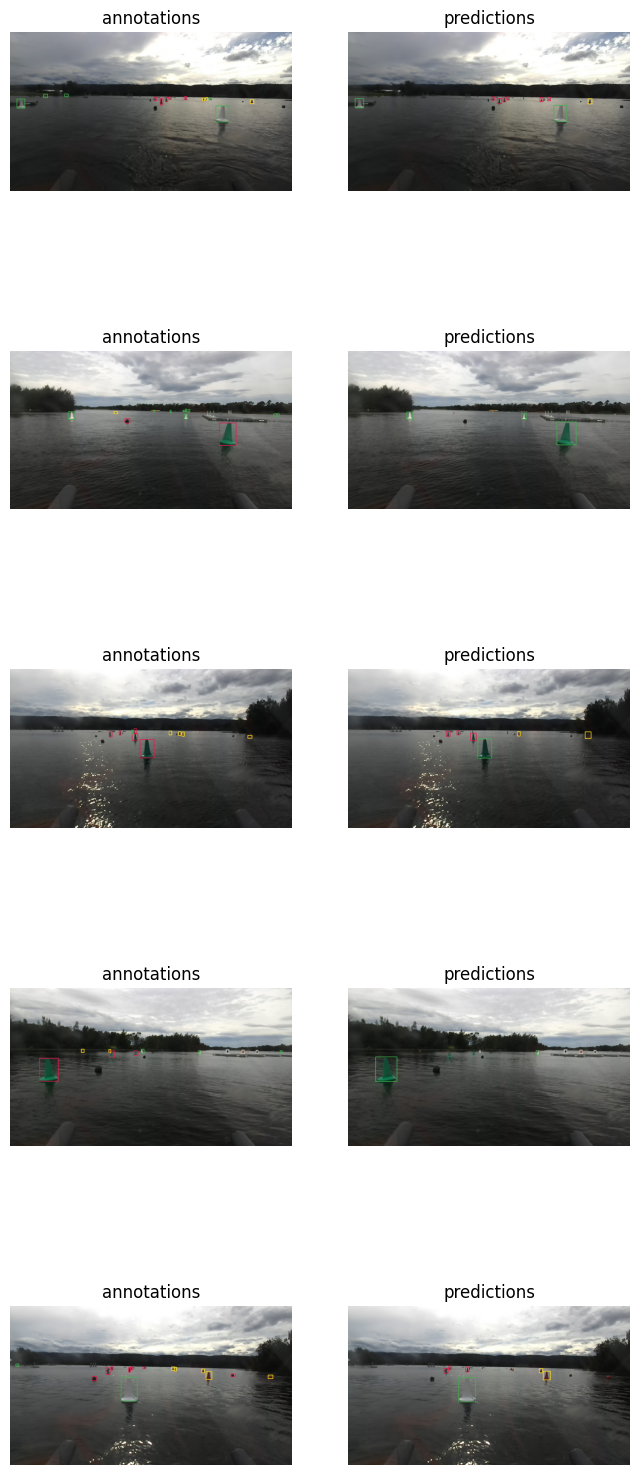

In [ ]:
import supervision as sv

MAX_IMAGE_COUNT = 5

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n)

box_annotator = sv.BoxAnnotator()

images = []
titles = []

for key in keys:
    frame_with_annotations = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=ds.annotations[key],
        skip_label=True
    )
    images.append(frame_with_annotations)
    titles.append('annotations')
    frame_with_predictions = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=predictions[key],
        skip_label=True
    )
    images.append(frame_with_predictions)
    titles.append('predictions')

%matplotlib inline
sv.plot_images_grid(images=images, titles=titles, grid_size=(n, 2), size=(2 * 4, n * 4))

[2023-09-23 21:49:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


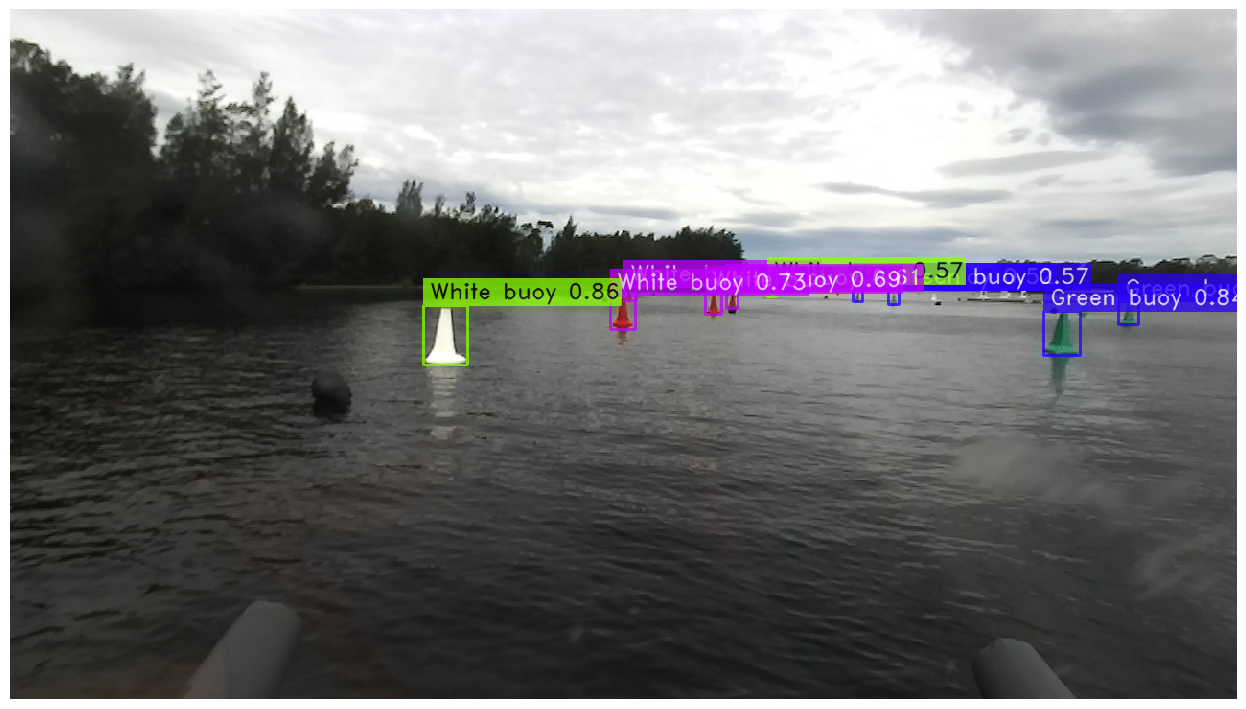

In [ ]:
best_model.predict('/content/drive/MyDrive/skin_data/bouy_project/val/color000000.jpg').show()